# Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('car_purchasing.csv', encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


##Country with Highest Number of Car Purchases

In [ ]:
country_counts = df['country'].value_counts()

# Find the maximum occurrence
max_occurrence = country_counts.max()

# Find the countries with the maximum occurrence
most_purchasing_countries = country_counts[country_counts == max_occurrence].index.tolist()

if len(most_purchasing_countries) == 1:
    print(f'People from {most_purchasing_countries[0]} made {max_occurrence} purchases, which is the most purchasing country in the dataset.')
else:
    countries_str = ', '.join(most_purchasing_countries)
    print(f'People from {countries_str} made {max_occurrence} purchases, which is the most purchasing country(s) in the dataset.')


People from Israel, Mauritania, Bolivia made 6 purchases, which is the most purchasing country(s) in the dataset.


##Bar Graph on Top 25 Countries with the Most Customers

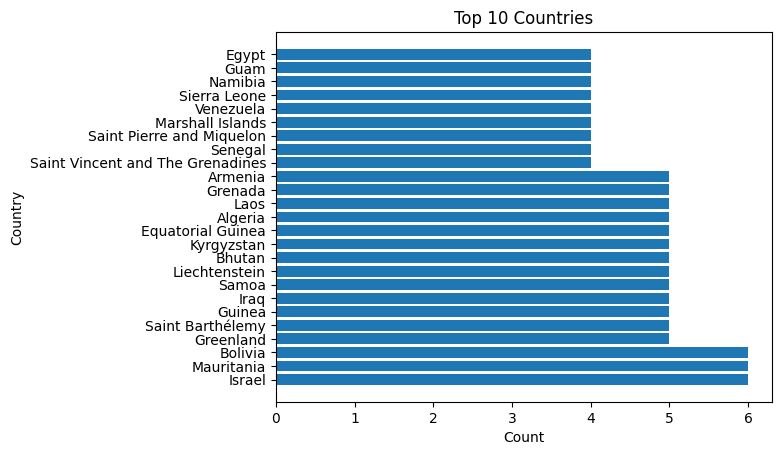

In [ ]:
top_n = df['country'].value_counts().head(25)

plt.barh(top_n.index, top_n.values)
plt.xlabel("Count")
plt.ylabel("Country")
plt.title("Top 10 Countries")
plt.show()

##Pie Chart on Customer Ages

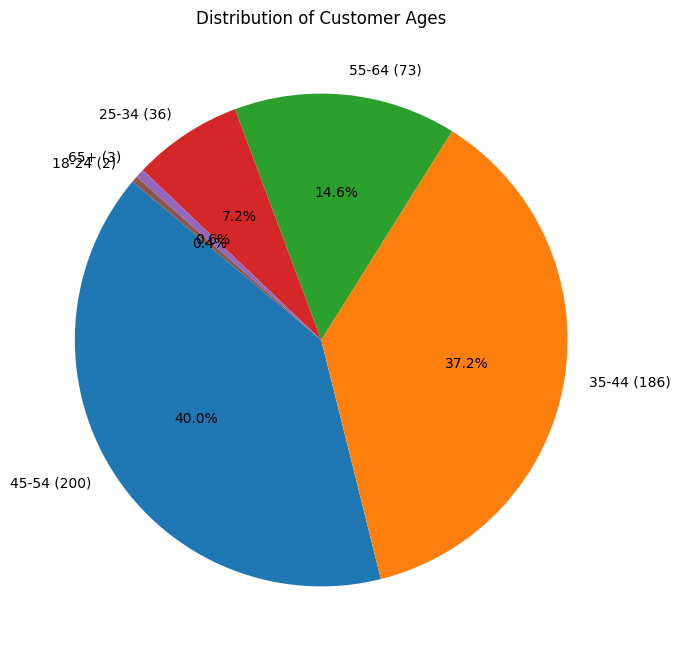

In [ ]:
age_ranges = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
bins = [18, 25, 35, 45, 55, 65, df['age'].max()]

# Use pd.cut to categorize ages into ranges without modifying the DataFrame
age_ranges = pd.cut(df['age'], bins=bins, labels=age_ranges)

# Count the occurrences of each age range
age_range_counts = age_ranges.value_counts()

# Create a pie chart with both count and percentage labels
plt.figure(figsize=(8, 8))
labels = [f'{age_range} ({count})' for age_range, count in zip(age_range_counts.index, age_range_counts)]
plt.pie(age_range_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customer Ages')
plt.show()

##Dropping Unnecessary Columns

In [ ]:
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)

##Heat Map

                          age  annual Salary  credit card debt  net worth  car purchase amount
age                  1.000000       0.000130          0.034721   0.020356             0.632865
annual Salary        0.000130       1.000000          0.049599   0.014767             0.617862
credit card debt     0.034721       0.049599          1.000000  -0.049378             0.028882
net worth            0.020356       0.014767         -0.049378   1.000000             0.488580
car purchase amount  0.632865       0.617862          0.028882   0.488580             1.000000


<Axes: >

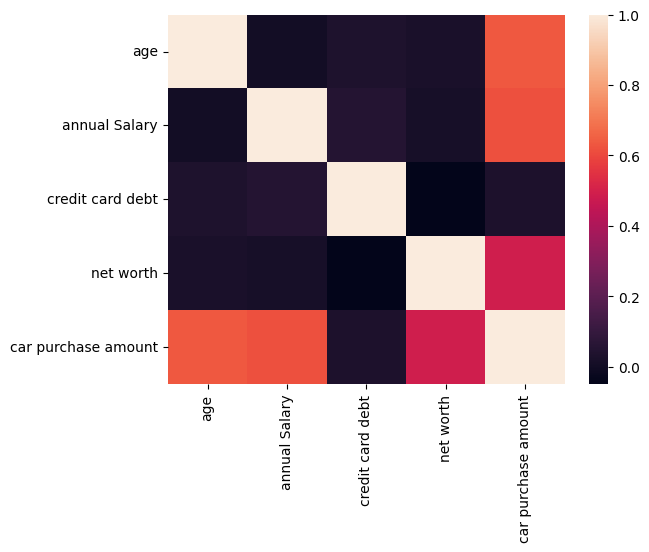

In [ ]:
mat = df.corr()

print(mat.to_string())
sns.heatmap(mat)

In [ ]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
print(X)

           age  annual Salary  credit card debt    net worth
0    41.851720    62812.09301      11609.380910  238961.2505
1    40.870623    66646.89292       9572.957136  530973.9078
2    43.152897    53798.55112      11160.355060  638467.1773
3    58.271369    79370.03798      14426.164850  548599.0524
4    57.313749    59729.15130       5358.712177  560304.0671
..         ...            ...               ...          ...
495  41.462515    71942.40291       6995.902524  541670.1016
496  37.642000    56039.49793      12301.456790  360419.0988
497  53.943497    68888.77805      10611.606860  764531.3203
498  59.160509    49811.99062      14013.034510  337826.6382
499  46.731152    61370.67766       9391.341628  462946.4924

[500 rows x 4 columns]


In [ ]:
print(y)

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 500, dtype: float64


# Preprocessing

In [ ]:
scale = MinMaxScaler()
X = scale.fit_transform(X)
y = scale.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Linear regrssion

In [ ]:
#Trying linear regression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train score', lreg.score(X_train, y_train))
print('Test score', lreg.score(X_test, y_test))

Train score 0.9999999811902596
Test score 0.999999980937226


# ANN Model

In [ ]:
model = Sequential([Dense(25, activation="relu",input_dim=4),
                 Dense(10, activation='relu'),
                 Dense(1, activation='linear')])

model.compile(optimizer='adam',
            loss='mean_squared_error',
            metrics=['mean_absolute_error'])

history = model.fit(X_train, y_train, epochs=200, validation_split=0.25)

Epoch 1/200
9/9 [==============================] - 4s 73ms/step - loss: 0.4543 - mean_absolute_error: 0.6495 - val_loss: 0.3556 - val_mean_absolute_error: 0.5750
Epoch 2/200
9/9 [==============================] - 0s 11ms/step - loss: 0.3329 - mean_absolute_error: 0.5510 - val_loss: 0.2626 - val_mean_absolute_error: 0.4901
Epoch 3/200
9/9 [==============================] - 0s 13ms/step - loss: 0.2461 - mean_absolute_error: 0.4710 - val_loss: 0.1953 - val_mean_absolute_error: 0.4202
Epoch 4/200
9/9 [==============================] - 0s 8ms/step - loss: 0.1912 - mean_absolute_error: 0.4129 - val_loss: 0.1553 - val_mean_absolute_error: 0.3714
Epoch 5/200
9/9 [==============================] - 0s 8ms/step - loss: 0.1524 - mean_absolute_error: 0.3651 - val_loss: 0.1221 - val_mean_absolute_error: 0.3256
Epoch 6/200
9/9 [==============================] - 0s 8ms/step - loss: 0.1183 - mean_absolute_error: 0.3169 - val_loss: 0.0908 - val_mean_absolute_error: 0.2760
Epoch 7/200
9/9 [==============

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                125       
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 396 (1.55 KB)
Trainable params: 396 (1.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


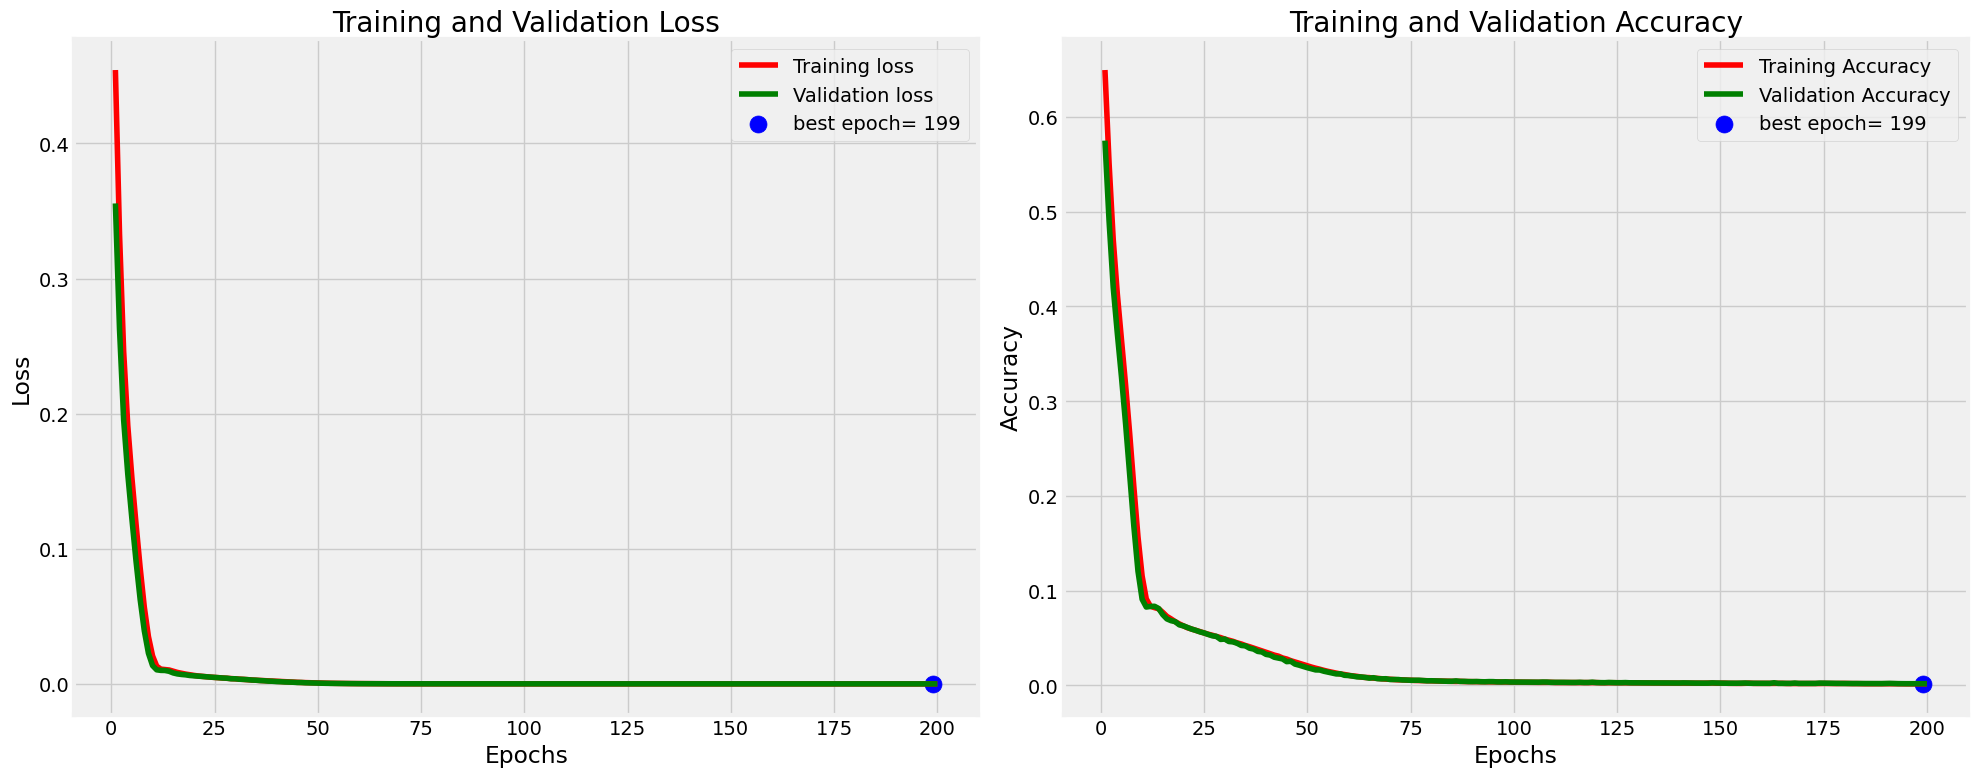

In [ ]:
tr_acc = history.history['mean_absolute_error']  # Training Mean Absolute Error
tr_loss = history.history['loss']  # Training Loss
val_acc = history.history['val_mean_absolute_error']  # Validation Mean Absolute Error
val_loss = history.history['val_loss']  # Validation Loss

# Find the index of the lowest validation loss and corresponding value
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

# Find the index of the lowest validation accuracy and corresponding value
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]  # List of epochs

# Labels for indicating the epoch with the lowest validation loss and highest validation accuracy
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Create a figure with two subplots (2 columns)
plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')  # Apply a specific style to the plots

# Subplot 1: Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Subplot 2: Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust the layout of subplots for better visualization
plt.tight_layout()

# Display the figure with the two subplots
plt.show()

In [ ]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


##Car Price Prediction Testing with a Sample

In [ ]:
new_data = np.array([[41.851720, 62812.09301, 11609.380910, 238961.2505]])

predicted_normalized = model.predict(new_data)
predicted_price = predicted_normalized[0][0]

actual_output = 35321.45877

print("Predicted Price:", predicted_price)
print("Actual Price:", actual_output)

print('mean square error:',((actual_output-predicted_price)**2)/2/10000000)

1/1 [==============================] - 0s 20ms/step
Predicted Price: 43280.637
Actual Price: 35321.45877
mean square error: 3.167425680993415


In [ ]:
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.9985301745950076
